In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate
import pickle
import numpy as np
from pathlib import Path

In [21]:
path = Path('../../../../data/midas data')

In [22]:
path.ls()

[PosixPath('../../../../data/midas data/test_image.pkl'),
 PosixPath('../../../../data/midas data/train_image.pkl'),
 PosixPath('../../../../data/midas data/.ipynb_checkpoints'),
 PosixPath('../../../../data/midas data/train_label.pkl')]

In [23]:
pickle_in = open(path/"train_image.pkl","rb")
train_image = pickle.load(pickle_in)
pickle_in = open(path/"test_image.pkl","rb")
test_image = pickle.load(pickle_in)
pickle_in = open(path/"train_label.pkl","rb")
train_label = pickle.load(pickle_in)

In [26]:
classes = {}
for i in range(0,len(train_label)):
    if train_label[i] not in classes.keys():
        classes[train_label[i]] = i

print(classes)

{0: 0, 2: 2000, 3: 4000, 6: 6000}


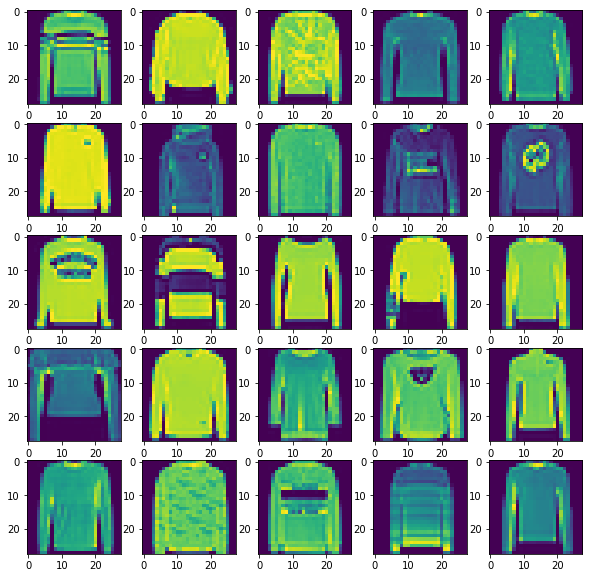

In [40]:
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = (np.reshape(train_image[i - 1 + 2000], (28, 28)))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [42]:
from scipy.misc import imsave

In [53]:
for i in range(0,len(train_image)):
    img = (np.reshape(train_image[i],(28,28)))
    plt.imsave(path/f'train/{train_label[i]}/{i}.jpg',img)

In [88]:
data = ImageDataBunch.from_folder(path, train="path/train",test = "test", valid_pct=0.2,
        ds_tfms=get_transforms(max_zoom=0.5, max_warp=0.05, max_rotate=0.05, max_lighting=0.2), size=229, num_workers=4).normalize(imagenet_stats)

In [89]:
data.classes

['0', '2', '3', '6']

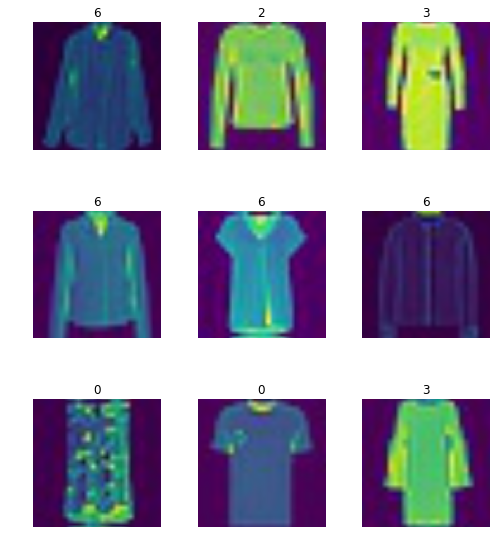

In [90]:
data.show_batch(rows=3, figsize=(7,8))

In [96]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [97]:
import gc
gc.collect()

422

In [98]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.795613,0.594412,0.231875
2,0.580281,0.478837,0.198125
3,0.474849,0.440289,0.178750
4,0.408087,0.427656,0.173125


In [99]:
learn.save('model1')

In [ ]:
for i in range(0,len(test_image)):
    img = (np.reshape(test_image[i],(28,28)))
    plt.imsave(path/f'test/{i}.jpg',img)